<a href="https://colab.research.google.com/github/andresRah/NLP_KeepCoding/blob/main/3)_Modelo_de_an%C3%A1lisis_de_sentimiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Práctica NLP
**Punto #3**

El alumno, con los datos preprocesados del ejercicio 2, deberá entrenar dos modelos distintos de los que, tras comparar sus resultados, elegirá uno como el mejor. Para tomar esta decisión se basará en las métricas que calcule (precision, recall, f1-score, ...). El enfoque será el de un problema de clasificación binaria supervisada.

Los modelos deberán tomar a su entrada los datos codificados con un modelo de bolsa de palabras (bag-of-words). Se deberán justificar los parámetros del vectorizer, así como tener en cuenta aspectos como el balanceo de clases.

**La elección de los modelos es libre.**

In [1]:
# Importar librerias necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from keras.optimizers import Adam

In [3]:
# Cargar el dataset preprocesado
file_path_preprocessed = 'corpus_two.csv'
df_preprocessed = pd.read_csv(file_path_preprocessed)

In [4]:
df_preprocessed.head(10)

,reviewText,overall,trend
0,purchased trilogy hoping two cat age would int...,3,0
1,usually one cat watching tv staying trouble dv...,5,1
2,bought triliogy tested dvd appears volume well...,4,1
3,female kitty could care le videosbut care le a...,4,1
4,gotten volume two would given five star since ...,3,0
5,rottie food allergy poultry beef dairy ive dif...,5,1
6,puppy love stuff tail start wagging soon ask h...,5,1
7,toy poodle love stuff let sort brush teeth hop...,4,1
8,work great dog doesnt hate taste gum health im...,5,1
9,yes princess enjoying taste showing getting be...,5,1


In [5]:
# Renombrar la columna 'trend' a 'sentiment' para mayor claridad
df_preprocessed = df_preprocessed.rename(columns={'trend': 'sentiment'})

In [7]:
# Definir las columnas de texto y etiquetas
X = df_preprocessed['reviewText']
y = df_preprocessed['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [8]:
# Vectorización usando Bag-of-Words
vectorizer = CountVectorizer(max_features=5000)

X_train_bow = vectorizer.fit_transform(X_train).toarray()
X_test_bow = vectorizer.transform(X_test).toarray()

array(['abandoned', 'ability', 'able', ..., 'zupreem', 'zyflamend',
       'zyme'], dtype=object)

## Modelado

### 1. ML Random Forest

In [14]:
# Modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_bow, y_train)

RandomForestClassifier(random_state=42)

In [15]:
# Predicciones y probabilidades para Random Forest
random_forest_train_predict = rf_model.predict(X_train_bow)
random_forest_test_predict = rf_model.predict(X_test_bow)
random_forest_test_predict_proba = rf_model.predict_proba(X_test_bow)[:, 1]

In [16]:
print("Random Forest - Train Set")
print(classification_report(y_train, random_forest_train_predict))
print("Random Forest - Test Set")
print(classification_report(y_test, random_forest_test_predict))

Random Forest - Train Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       922
           1       1.00      1.00      1.00      4326

    accuracy                           1.00      5248
   macro avg       1.00      1.00      1.00      5248
weighted avg       1.00      1.00      1.00      5248

Random Forest - Test Set
              precision    recall  f1-score   support

           0       0.65      0.09      0.16       339
           1       0.82      0.99      0.90      1411

    accuracy                           0.81      1750
   macro avg       0.73      0.54      0.53      1750
weighted avg       0.79      0.81      0.75      1750



### 1.1 Gráficas Random Forest

Recordando el análisis exploratorio, tenemos más reviews positivos que negativos

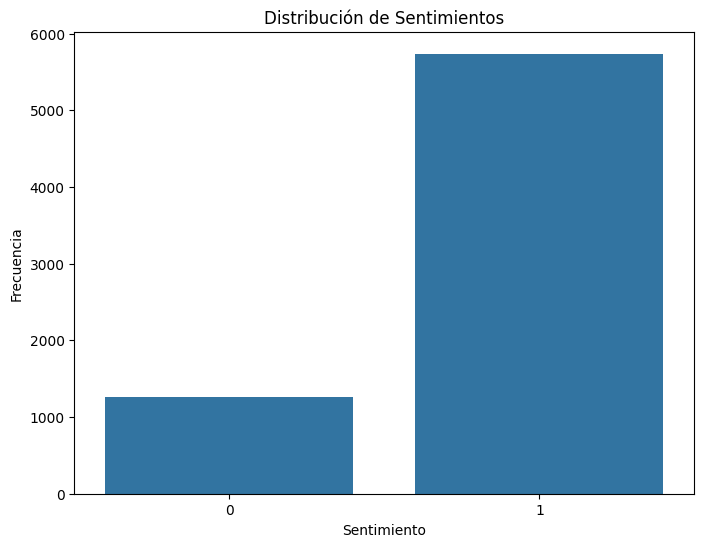

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualización de la distribución de sentimientos
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df_preprocessed)
plt.title('Distribución de Sentimientos')
plt.xlabel('Sentimiento')
plt.ylabel('Frecuencia')
plt.show()

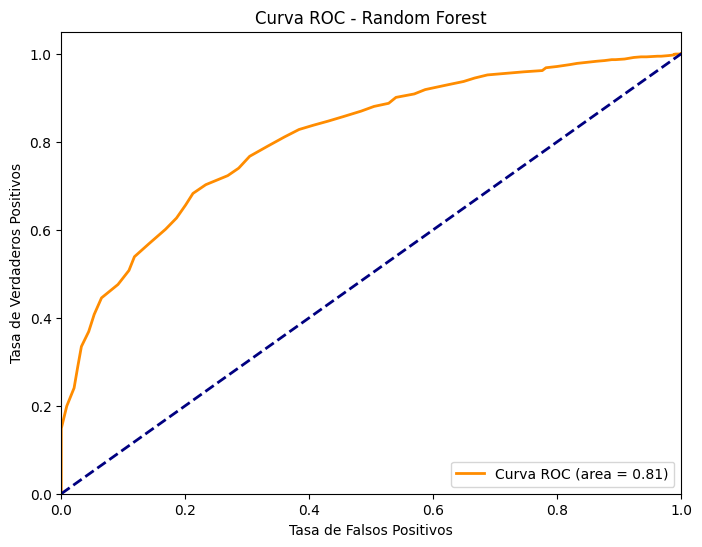

In [36]:
# Curva ROC y AUC para Random Forest
fpr, tpr, _ = roc_curve(y_test, random_forest_test_predict_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Random Forest')
plt.legend(loc="lower right")
plt.show()

El modelo Random Forest tiene un buen rendimiento global con un AUC de 0.81.

In [37]:
# Métricas adicionales para el modelo de Random Forest
print("Métricas adicionales para el modelo de Random Forest:")
accuracy_rf = accuracy_score(y_test, random_forest_test_predict)
print(f"Precisión: {accuracy_rf:.2f}")
classification_report_rf = classification_report(y_test, random_forest_test_predict, output_dict=True)
precision_rf = classification_report_rf['weighted avg']['precision']
recall_rf = classification_report_rf['weighted avg']['recall']
f1_score_rf = classification_report_rf['weighted avg']['f1-score']
print(f"Precisión: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1-Score: {f1_score_rf:.2f}")

Métricas adicionales para el modelo de Random Forest:
Precisión: 0.81
Precisión: 0.79
Recall: 0.81
F1-Score: 0.75


* El modelo clasifica correctamente el 81% de las instancias del conjunto de prueba.
* Una precisión de 0.79 significa que el 79% de las predicciones positivas del modelo son correctas.
* Un recall de 0.81 indica que el modelo identifica correctamente el 81% de las instancias positivas.
* El F1-Score nos indica la media de la precisión y el recall, proporcionando un balance entre ambos. 0.75 si bien no es un valor malo, abarca mucho campo de mejora.

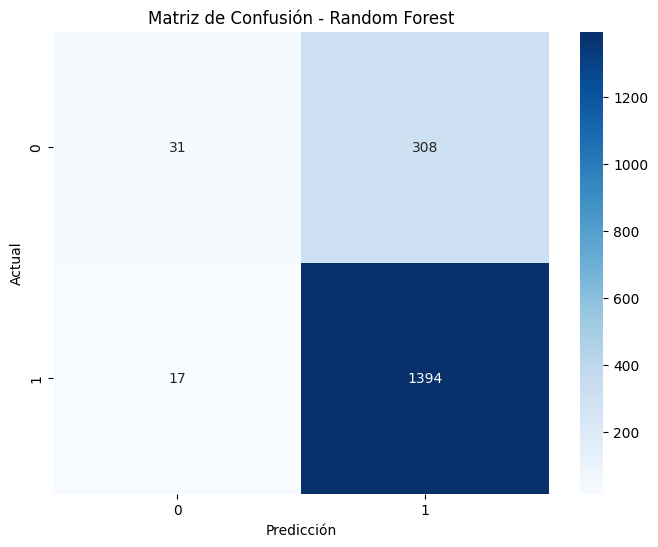

In [35]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc

# Matriz de confusión para Random Forest
conf_matrix_rf = confusion_matrix(y_test, random_forest_test_predict)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Random Forest')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.show()

**Verdaderos Negativos (TN): **31
**Falsos Positivos (FP):** 308
**Falsos Negativos (FN):** 17
**Verdaderos Positivos (TP):** 1394

**Tenemos una Alta Tasa de Falsos Positivos (FP):**

El modelo predijo que 308 instancias pertenecían a la clase 1 cuando en realidad pertenecían a la clase 0. Esto indica que el modelo tiene dificultades para identificar correctamente las instancias de la clase negativa (0).

**Conclusión**

El modelo Random Forest está sobreajustando a la clase mayoritaria (1), resultando en una alta tasa de falsos positivos para la clase minoritaria (0). Esto significa que, aunque el modelo es muy preciso en la predicción de la clase mayoritaria, tiene problemas significativos al clasificar correctamente las instancias de la clase minoritaria.



### 2. Modelo de Deep Learning usando RNN y LSTM

In [18]:
# Tokenización y Padding para RNN y LSTM
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [21]:
max_sequence_length = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length)

In [22]:
embedding_dim = 100
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

In [24]:
# Compilar el modelo de deep learning
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [25]:
# Entrenar el modelo
model.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test), verbose=2)

Epoch 1/5
82/82 - 32s - loss: 0.4703 - accuracy: 0.8215 - val_loss: 0.4111 - val_accuracy: 0.8126 - 32s/epoch - 393ms/step
Epoch 2/5
82/82 - 27s - loss: 0.3131 - accuracy: 0.8660 - val_loss: 0.4019 - val_accuracy: 0.8343 - 27s/epoch - 333ms/step
Epoch 3/5
82/82 - 31s - loss: 0.2155 - accuracy: 0.9127 - val_loss: 0.4301 - val_accuracy: 0.8309 - 31s/epoch - 373ms/step
Epoch 4/5
82/82 - 28s - loss: 0.1575 - accuracy: 0.9404 - val_loss: 0.4833 - val_accuracy: 0.8331 - 28s/epoch - 339ms/step
Epoch 5/5
82/82 - 26s - loss: 0.1092 - accuracy: 0.9630 - val_loss: 0.5405 - val_accuracy: 0.8149 - 26s/epoch - 316ms/step


In [26]:
# Predicciones y probabilidades para el modelo de Deep Learning
deep_train_predict = (model.predict(X_train_pad) > 0.5).astype("int32")
deep_test_predict = (model.predict(X_test_pad) > 0.5).astype("int32")
deep_test_predict_proba = model.predict(X_test_pad)

55/55 [==============================] - 5s 83ms/step


In [27]:
# Métricas generales para el modelo de Deep Learning
print("Deep Learning - Train Set")
print(classification_report(y_train, deep_train_predict))
print("Deep Learning - Test Set")
print(classification_report(y_test, deep_test_predict))

Deep Learning - Train Set
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       922
           1       0.99      0.99      0.99      4326

    accuracy                           0.99      5248
   macro avg       0.97      0.97      0.97      5248
weighted avg       0.99      0.99      0.99      5248

Deep Learning - Test Set
              precision    recall  f1-score   support

           0       0.53      0.41      0.46       339
           1       0.87      0.91      0.89      1411

    accuracy                           0.81      1750
   macro avg       0.70      0.66      0.67      1750
weighted avg       0.80      0.81      0.81      1750



**Precisión:** 0.81

**Recall:** 0.91 para la clase positiva y 0.41 para la clase negativa, lo que significa un **mejor manejo de la clase negativa** en comparación con Random Forest.

**F1-Score:** 0.89 para la clase positiva y 0.46 para la clase negativa, reflejando un mejor balance general en comparación con Random Forest.

In [28]:
# Guardar los resultados en un DataFrame
df_preds = pd.DataFrame({
    'y_actual': y_test,
    'y_pred_test_random_forest': random_forest_test_predict,
    'y_pred_proba_test_random_forest': random_forest_test_predict_proba,
    'y_pred_test_deep': deep_test_predict.flatten(),
    'y_pred_proba_test_deep': deep_test_predict_proba.flatten()
})

df_preds.to_csv('preds.csv', index=False)

In [30]:
df_preds.head(10)

,y_actual,y_pred_test_random_forest,y_pred_proba_test_random_forest,y_pred_test_deep,y_pred_proba_test_deep
3862,1,1,0.95,1,0.999654
2942,1,1,0.78,1,0.999735
4352,1,1,0.94,1,0.995372
263,1,1,0.97,1,0.778933
4348,1,1,0.99,1,0.998686
3422,1,1,0.68,0,0.044733
2473,1,1,0.83,1,0.621873
6729,1,1,0.71,1,0.983054
6892,1,1,0.89,1,0.988771
4629,1,1,0.97,0,0.423065
